# Esercitazione 6
Vanno ancora risistemati

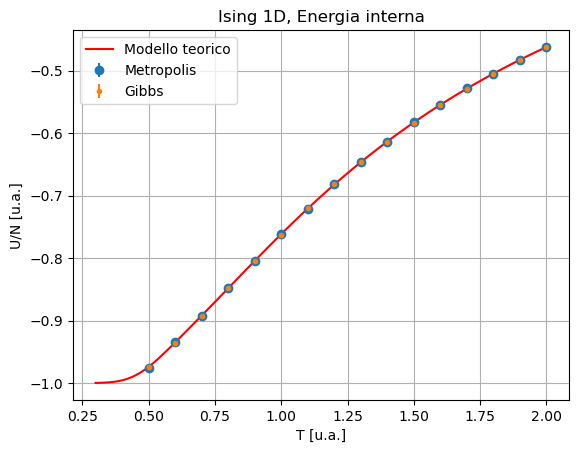

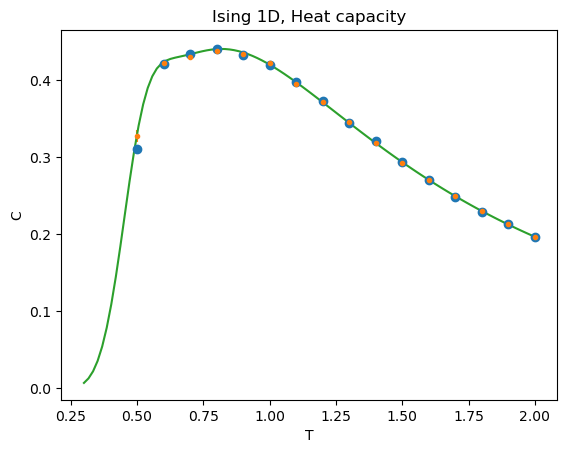

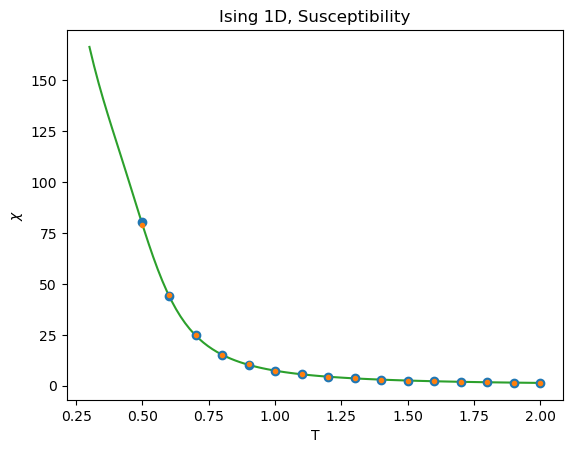

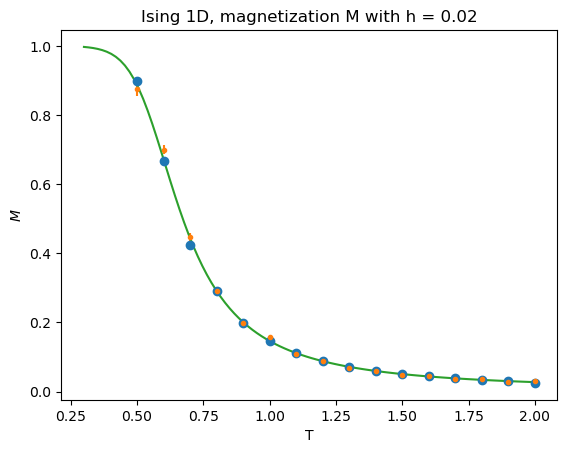

In [27]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.3,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )
x, sum41, error = np.loadtxt("METRO/final.ene", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
x, sum41, error = np.loadtxt("GIBBS/final.ene", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='.', linestyle='none', label='Gibbs')
plt.plot(T, e,label='Modello teorico',color='r')
plt.title('Ising 1D, Energia interna')
plt.xlabel('T [u.a.]')
plt.ylabel('U/N [u.a.]')
plt.grid(True)
plt.legend()
plt.show()

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
x, sum41, error = np.loadtxt("METRO/final.heat", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
x, sum41, error = np.loadtxt("GIBBS/final.heat", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='.', linestyle='none', label='Gibbs')
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
x, sum41, error = np.loadtxt("METRO/final.chi", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
x, sum41, error = np.loadtxt("GIBBS/final.chi", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='.', linestyle='none', label='Gibbs')
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
x, sum41, error = np.loadtxt("METRO/final.mag", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='o', linestyle='none', label='Metropolis')
x, sum41, error = np.loadtxt("GIBBS/final.mag", usecols=(0,1,2), unpack='true')
plt.errorbar(x,sum41,yerr=error,marker='.', linestyle='none', label='Gibbs')
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()